In [2]:
from gensim.models import FastText
import os,sys
from urllib.parse import urlparse
from getImagesFunctions import *
from getDataFunctions import *
from gensim.models import Word2Vec
import gensim
import random
import langid
import re
import ast
import concurrent
import htmldate
import time
import uuid
from nltk.tokenize import word_tokenize
import multiprocessing
from multiprocessing import Process, Manager, Pool
import sys
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import numpy as np
from scipy import spatial

C:\ProgramData\Anaconda3\lib\site-packages\gensim\utils.py:1212: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [32]:
df = pd.read_csv('C:/Users/Ruben/Documents/GitHub/ReACT_GCV/code/work/scrape_environment/image_npg_1/txt/txt_csv_iter1.csv')

In [6]:
sents = [ast.literal_eval(i) for i in df['txt']]
sents = [" ".join([" ".join(s) for s in par]) for par in sents]
sents = [s.split(' ') for s in sents]
ids = [i.split('_')[1] for i in list(df['id'])]
sents = list(zip(ids,sents))

In [13]:
df = pd.DataFrame(list({id_:len(sent) for id_,sent in sents}.items()),columns=['id','len']).sort_values('len',ascending=False).reset_index(drop=True)

In [16]:
df['id_num'] = df.index

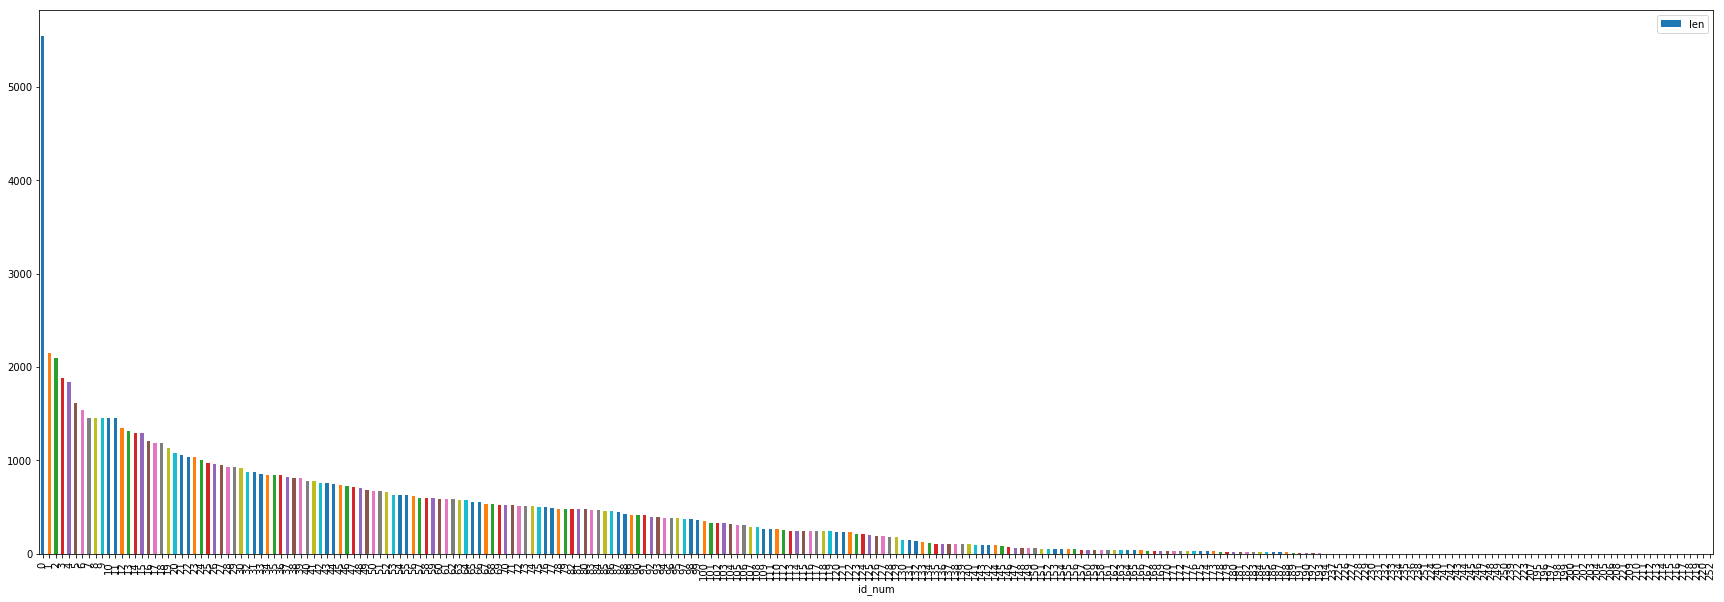

In [20]:
p = df.sort_values('len', ascending=False)[['len','id_num']].plot.bar(x='id_num', y='len',figsize=(30,10))


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001AB973DEA20>]],
      dtype=object)

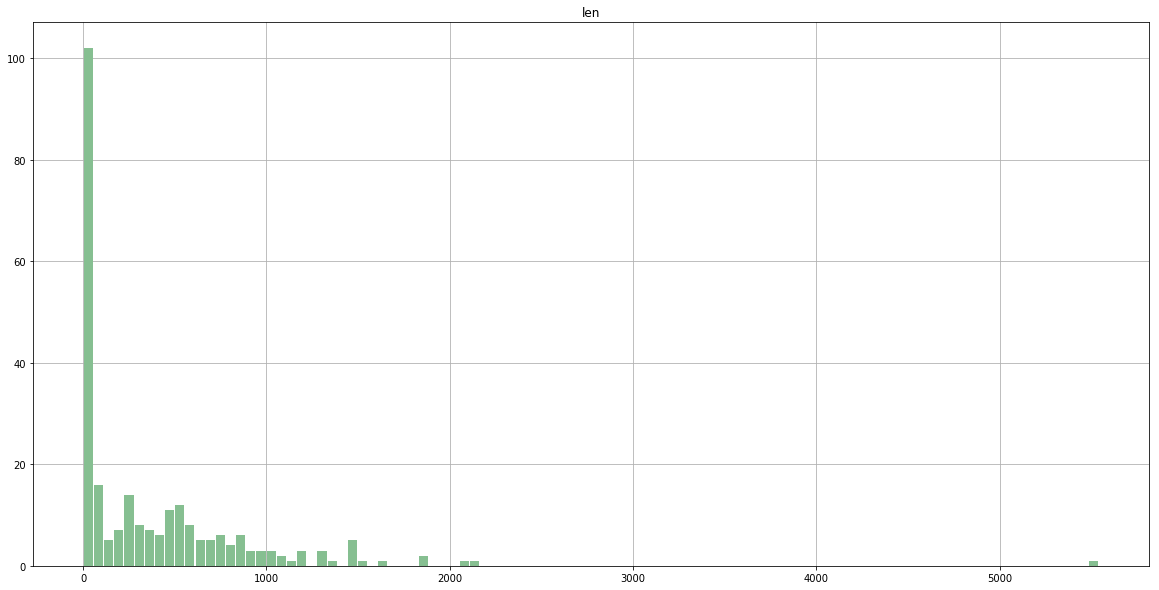

In [27]:
df.hist(column='len', bins = 100, color='#86bf91', zorder=2, rwidth=0.9,figsize=(20,10))


In [30]:
[print(i) for i in df[df['len'] < 5]['id']]

https://www.thenewslens.com/tag/%E9%BB%83%E5%85%AC%E5%B4%B4
https://www.offsite.com.cy/perissotera/viral/koritsi-tis-napalm-brabeytike-sti-germania-eikones
https://ione.net/em-be-napalm/tag-315443-1.html
https://www.reforma.com/aplicaciones/articulo/default.aspx?id=1606106
https://www.offsite.com.cy/eidiseis/diethni/koritsi-tis-napalm-i-apisteyti-istoria-tis-fotografiasvid
https://ballkani.info/2019/10/vajza-e-napalmit-ndihej-e-turperuar-qe-u-fotografua-e-zhveshur-donte-te-kishte-vdekur/
http://gerente.com/en-us/new-rss/vietnam-war-my-clothes-burned-and-fell-off-my-body-survivor-reveals-horrific-events/
https://kknews.cc/zh-my/world/2mg8rx9.html
http://en.mogaznews.com/World-News/155115.html
https://sot-ks.com/cluster/415514/
https://www.i24news.tv/ar/%D8%A3%D8%AE%D8%A8%D8%A7%D8%B1/%D8%AF%D9%88%D9%84%D9%8A/84777-150906-%D8%A7%D9%84%D8%B7%D9%81%D9%84-%D8%A7%D9%84%D8%B3%D9%88%D8%B1%D9%8A-%D8%A7%D9%84%D8%BA%D8%B1%D9%8A%D9%82-%D9%88%D8%B7%D9%84%D9%82%D8%A7%D8%AA-%D8%A3%D8%AE%D8%B1%D9%89-%D

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [35]:
[u for i,u in sents if i == "https://www.anandabazar.com/international/this-single-photograph-helped-to-stop-vietnam-war-dgtl-1.961109"]

[['']]

In [36]:
[i for i in df['id'] if i.split('_')[1] == "https://www.anandabazar.com/international/this-single-photograph-helped-to-stop-vietnam-war-dgtl-1.961109"]

['9e3c95e2-4c61-4f3e-9c71-c01c4537ef39.html_https://www.anandabazar.com/international/this-single-photograph-helped-to-stop-vietnam-war-dgtl-1.961109']